In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('fruit_data_with_colors.txt',sep='\t')#by telling explicitly that the separator is slash and not comma we can get separate column

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:

df.size

413

In [5]:
df.shape

(59, 7)

In [6]:
df.head#unlike csv they are not separated by comma but by a slash

<bound method NDFrame.head of     fruit_label fruit_name     fruit_subtype  mass  width  height  color_score
0             1      apple      granny_smith   192    8.4     7.3         0.55
1             1      apple      granny_smith   180    8.0     6.8         0.59
2             1      apple      granny_smith   176    7.4     7.2         0.60
3             2   mandarin          mandarin    86    6.2     4.7         0.80
4             2   mandarin          mandarin    84    6.0     4.6         0.79
5             2   mandarin          mandarin    80    5.8     4.3         0.77
6             2   mandarin          mandarin    80    5.9     4.3         0.81
7             2   mandarin          mandarin    76    5.8     4.0         0.81
8             1      apple          braeburn   178    7.1     7.8         0.92
9             1      apple          braeburn   172    7.4     7.0         0.89
10            1      apple          braeburn   166    6.9     7.3         0.93
11            1      a

In [7]:
fname = df.fruit_name.unique()
fname#method unique used to print an array of all the unique names present useful for determining the different types of fruits in the list

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

In [8]:
fsize = df.groupby('fruit_name',sort= False).size()
fsize

fruit_name
apple       19
mandarin     5
orange      19
lemon       16
dtype: int64

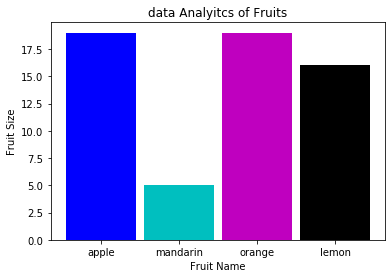

In [9]:
import matplotlib.pyplot as plt
plt.bar(fname, fsize, width=0.9, color=['b','c','m','k'])
plt.xlabel('Fruit Name')
plt.ylabel('Fruit Size')
plt.title('data Analyitcs of Fruits')
plt.show()

In [10]:
x=df.iloc[:,3:6].values
y=df.iloc[:,[1]].values


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [13]:
from sklearn.preprocessing import StandardScaler
norm = StandardScaler()
x_train = norm.fit_transform(x_train)
x_test = norm.fit_transform(x_test)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
model=LogisticRegression()
model.fit(x_train,y_train) 
y_pred = model.predict(x_test)#x_test is the testing variable and if y_pred will be the same as y_test then it is accurate 
y_pred

c:\users\shivani\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['orange', 'lemon', 'lemon', 'lemon', 'orange', 'apple', 'apple',
       'lemon', 'apple', 'apple', 'mandarin', 'orange', 'apple', 'apple',
       'orange'], dtype=object)

In [16]:
y_test

array([['orange'],
       ['orange'],
       ['lemon'],
       ['orange'],
       ['apple'],
       ['apple'],
       ['orange'],
       ['lemon'],
       ['orange'],
       ['apple'],
       ['mandarin'],
       ['apple'],
       ['orange'],
       ['orange'],
       ['orange']], dtype=object)

In [17]:
model.score(x_test,y_test)*100

46.666666666666664

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
accuracy_score(y_test,y_pred)*100

46.666666666666664

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
model1 = DecisionTreeClassifier()

In [22]:
model1.fit(x_train,y_train)#note criterion will be gini

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
y_pred1 = model1.predict(x_test)
y_pred1

array(['orange', 'orange', 'lemon', 'lemon', 'orange', 'apple', 'apple',
       'lemon', 'orange', 'apple', 'mandarin', 'apple', 'orange', 'lemon',
       'apple'], dtype=object)

In [24]:
y_test

array([['orange'],
       ['orange'],
       ['lemon'],
       ['orange'],
       ['apple'],
       ['apple'],
       ['orange'],
       ['lemon'],
       ['orange'],
       ['apple'],
       ['mandarin'],
       ['apple'],
       ['orange'],
       ['orange'],
       ['orange']], dtype=object)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred1,y_test)*100

66.66666666666666

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
df.shape

(59, 7)

In [28]:
model = KNeighborsClassifier(n_neighbors =7 ,metric='euclidean')

In [29]:
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

c:\users\shivani\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


array(['orange', 'orange', 'lemon', 'lemon', 'orange', 'orange', 'apple',
       'lemon', 'orange', 'orange', 'mandarin', 'orange', 'orange',
       'apple', 'apple'], dtype=object)

In [30]:
y_test

array([['orange'],
       ['orange'],
       ['lemon'],
       ['orange'],
       ['apple'],
       ['apple'],
       ['orange'],
       ['lemon'],
       ['orange'],
       ['apple'],
       ['mandarin'],
       ['apple'],
       ['orange'],
       ['orange'],
       ['orange']], dtype=object)

In [31]:
model.score(x_test,y_test)*100

46.666666666666664